# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1  [25 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes. The time of the day on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1 Use pandas to load the dataset from the csv file ...**

In [3]:
# read the file
# your code here
all_data = pd.read_csv('./data/dataset_1.csv')

In [4]:
# split the data
# your code here
train_data, test_data = train_test_split(all_data, test_size = 0.2, random_state = 42)

In [5]:
# your code here


In [6]:
# Test size is indeed 20% of total
# your code here 
print('proportion of all data in test set: ', len(test_data)/len(all_data))

proportion of all data in test set:  0.2


**1.2 Generate a scatter plot of the training data points**

Text(0.5,1,'Number of Taxi Pickups Throughout the Day in NYC (January 2015)')

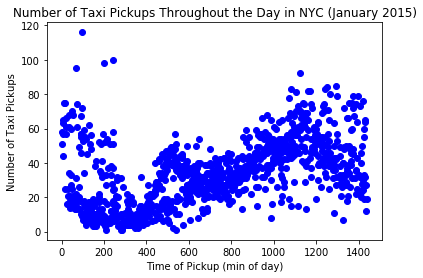

In [7]:
# Your code here
plt.plot(train_data.TimeMin, train_data.PickupCount, 'bo')
plt.xlabel('Time of Pickup (min of day)')
plt.ylabel('Number of Taxi Pickups')
plt.title('Number of Taxi Pickups Throughout the Day in NYC (January 2015)')

**1.3 Discuss your results. Does the pattern of taxi pickups make intuitive sense to you?**

*your answer here*

This pattern makes sense. Taxi pickups generally are most frequent around 1200 minutes or 8pm and are least frequent around 300 minutes or 5am. There is a small peak during rush hour in the morning around 500 minutes (8am).

<div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1 Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary ... **

In [8]:
# your code here
neighbours = [1,10,75,250,500,750,1000]
KNNModels = {k:KNeighborsRegressor(n_neighbors = k).fit(X = train_data[['TimeMin']], y =train_data[['PickupCount']]) for k in neighbours}

**2.2 For each $k$ on the training set, overlay a scatter plot ... **

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


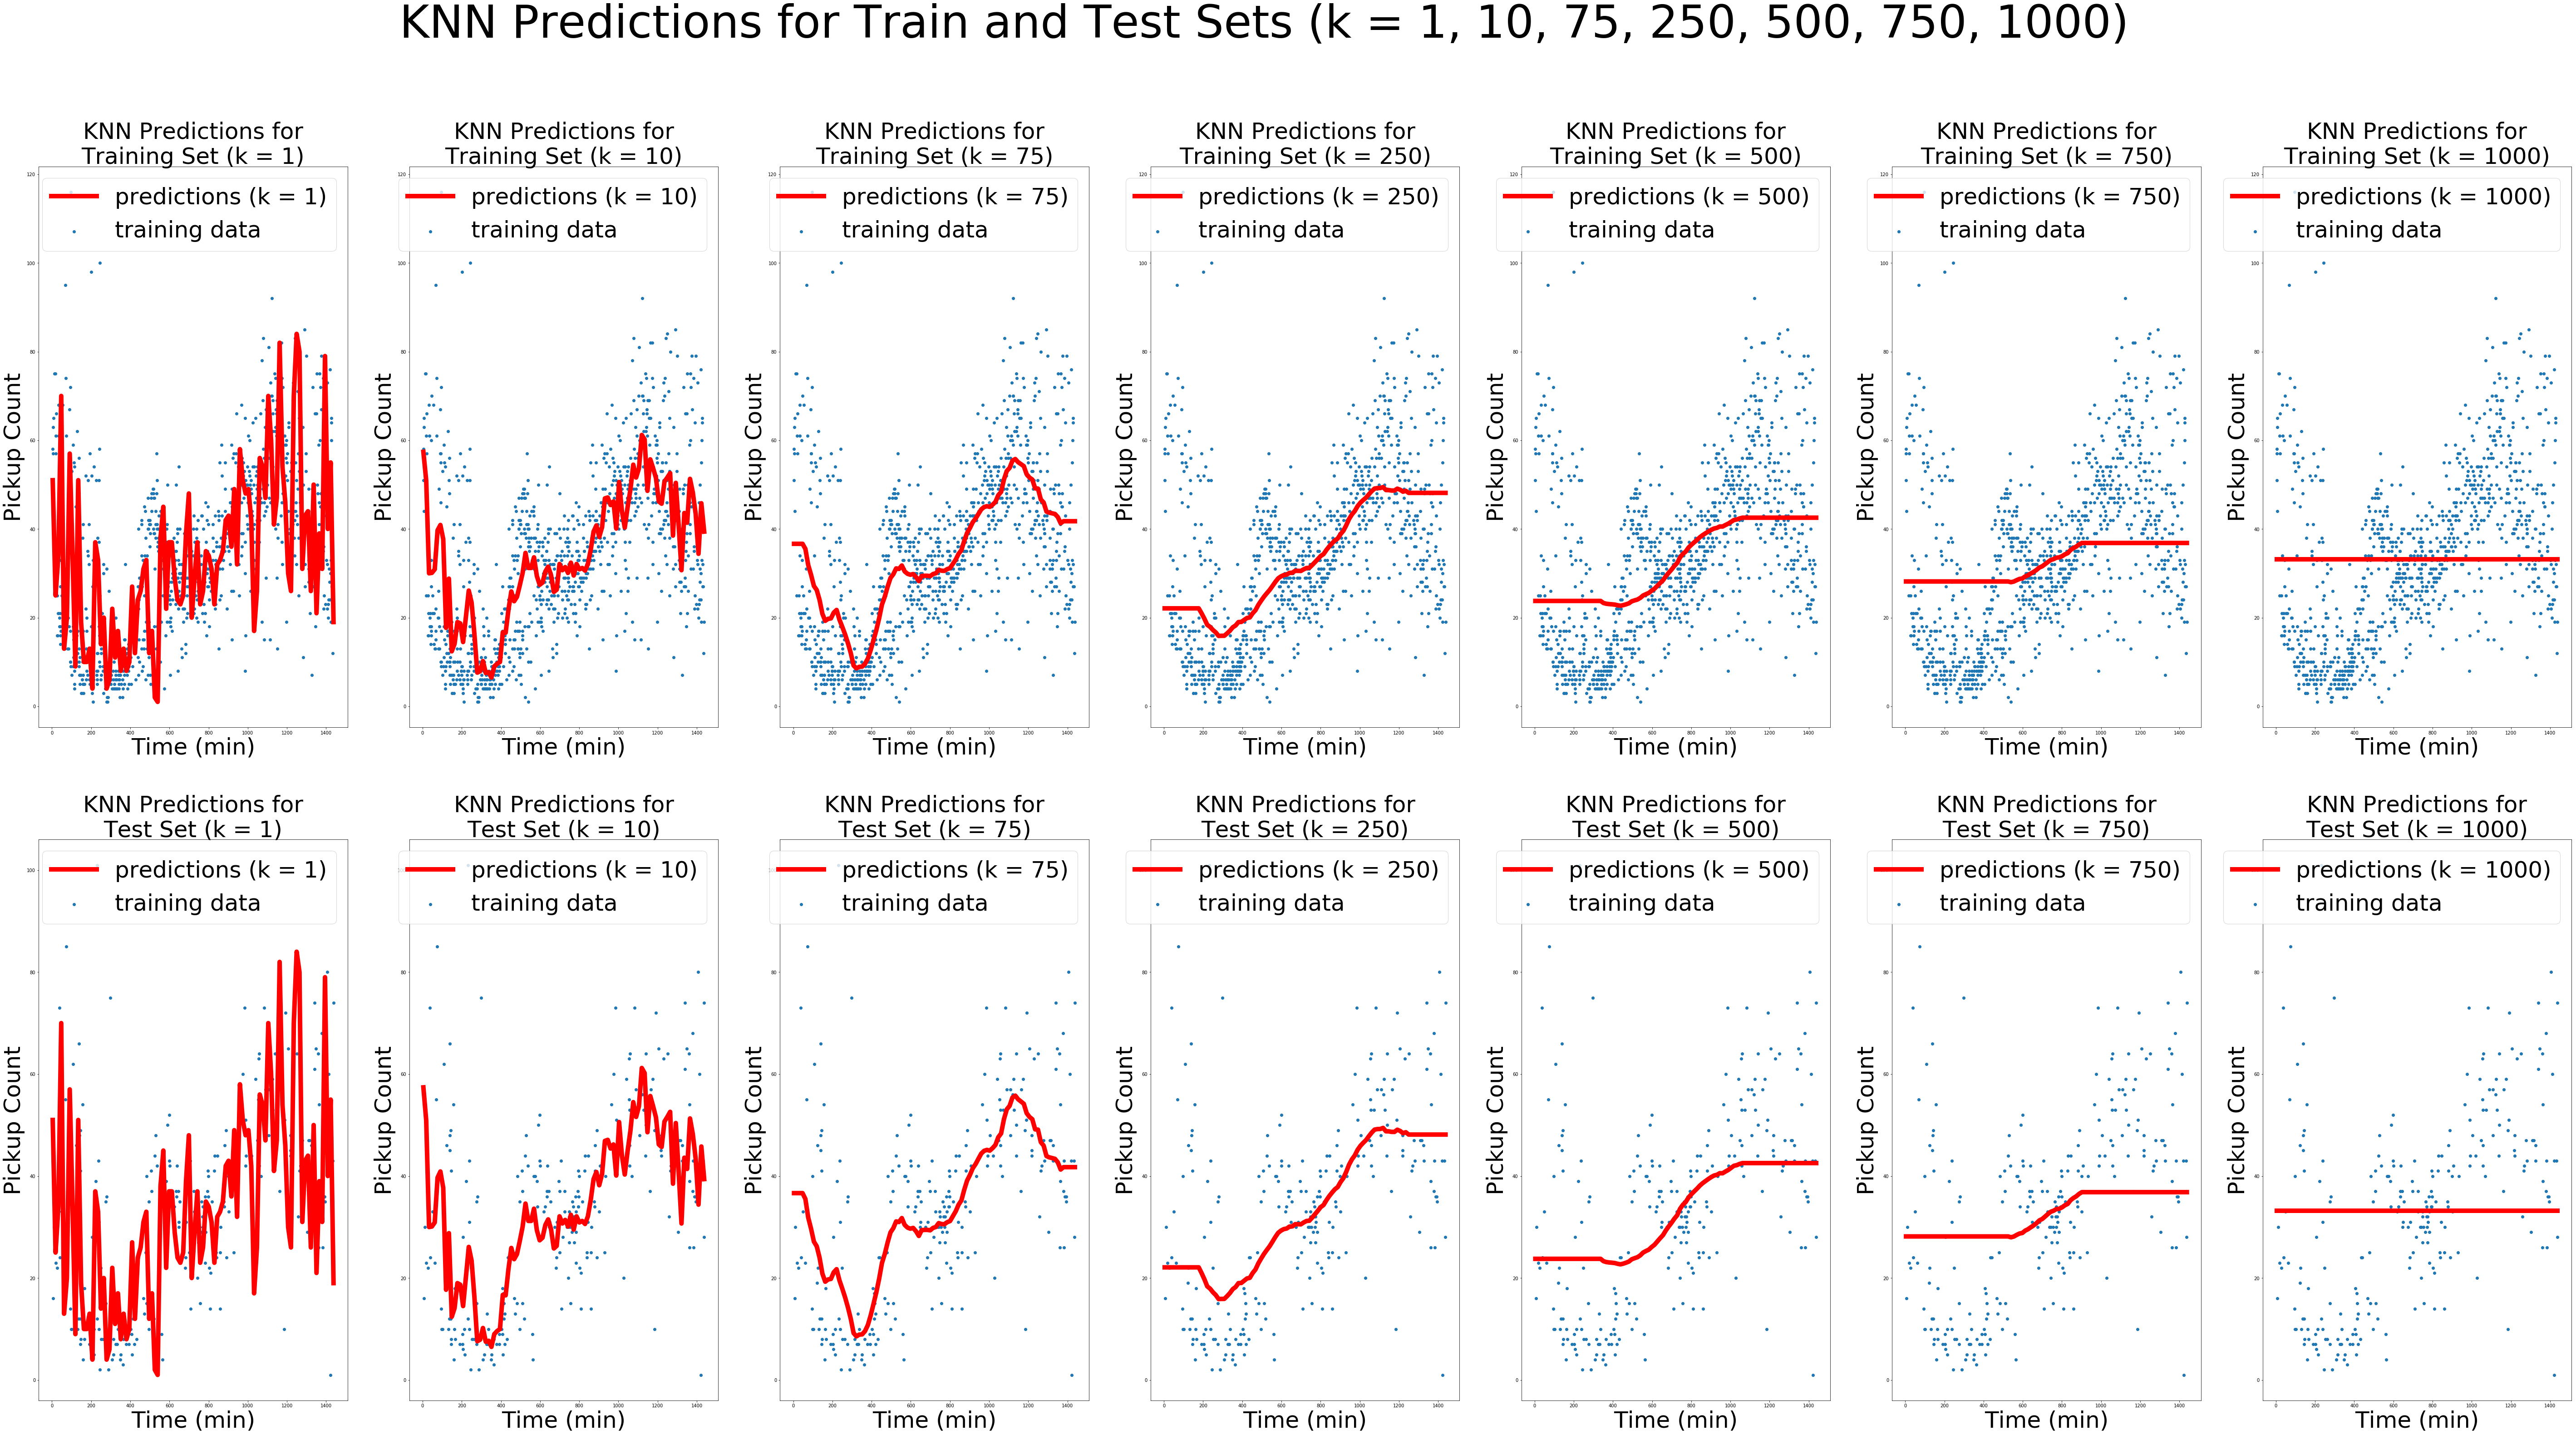

In [9]:
# Plot predictions vs actual
# your code here 
fig, (ax1, ax2) = plt.subplots(2, 7, figsize = (100,50))
x = np.linspace(train_data[['TimeMin']].min()[0], train_data[['TimeMin']].max()[0], 100)

for idx, ax in enumerate(ax1):
    k = neighbours[idx]
    ax.scatter(train_data[['TimeMin']], train_data[['PickupCount']], label = 'training data')
    ax.plot(x, 
            KNNModels[k].predict(x.reshape(100,1)), 
            linewidth = 10,
            color = 'red',
            label = 'predictions (k = %i)' % k)
    ax.set_xlabel('Time (min)', fontsize=50)
    ax.set_ylabel('Pickup Count', fontsize=50)
    ax.set_title('KNN Predictions for\nTraining Set (k = {})'.format(k), fontsize=50)
    ax.legend(fontsize=50)
for idx, ax in enumerate(ax2):
    k = neighbours[idx]
    ax.scatter(test_data[['TimeMin']], test_data[['PickupCount']], label = 'training data')
    ax.plot(x, 
            KNNModels[k].predict(x.reshape(100,1)), 
            linewidth = 10,
            color = 'red',
            label = 'predictions (k = %i)' % k)
    ax.set_xlabel('Time (min)', fontsize=50)
    ax.set_ylabel('Pickup Count', fontsize=50)
    ax.set_title('KNN Predictions for\nTest Set (k = {})'.format(k), fontsize=50)
    ax.legend(fontsize=50)
fig.suptitle("KNN Predictions for Train and Test Sets (k = 1, 10, 75, 250, 500, 750, 1000)", fontsize=100)
fig.show()

**2.3 Report the $R^2$ score for the fitted models ... **

In [10]:
# your code here
r2_scores = []
for k in KNNModels:
    r2 = r2_score(train_data[['PickupCount']], KNNModels[k].predict(train_data[['TimeMin']]))
    r2_scores.append({
        "num_of_neighbours": k,
        "r2_score" : r2,
        "type":"Training Data"
    })
    r2 = r2_score(test_data[['PickupCount']], KNNModels[k].predict(test_data[['TimeMin']]))
    r2_scores.append({
        "num_of_neighbours": k,
        "r2_score":r2,
        "type":"Test Data"
    })
r2_df = pd.DataFrame(r2_scores)
r2_df

,num_of_neighbours,r2_score,type
0,1,0.712336,Training Data
1,1,-0.418932,Test Data
2,10,0.509825,Training Data
3,10,0.272068,Test Data
4,75,0.445392,Training Data
5,75,0.390310,Test Data
6,250,0.355314,Training Data
7,250,0.340341,Test Data
8,500,0.290327,Training Data
9,500,0.270321,Test Data


**2.4 Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$**

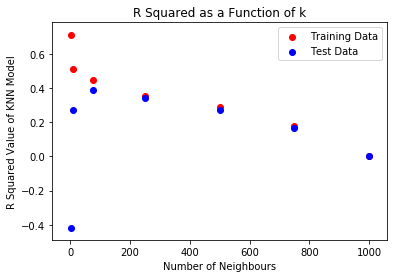

In [11]:
# your code here
colours = {'Training Data':'red', 'Test Data':'blue'}
for data_type in ['Training Data', 'Test Data']:
    plt.scatter(r2_df[r2_df.type == data_type].num_of_neighbours, 
                r2_df[r2_df.type == data_type].r2_score,
                c= 'red' if data_type == 'Training Data' else 'blue',
                label=data_type)
plt.xlabel("Number of Neighbours")
plt.ylabel("R Squared Value of KNN Model")
plt.title("R Squared as a Function of k")
plt.legend()

**2.5 Discuss the results**

**1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?**

If k = n, the model will predict the mean of the training data at every point and $R^2$ would be 0 on the this dataset.

**2. What does an $R^2$ score of $0$ mean?**

It means that the model explains none of the variance in the dependent variable. Predicting the dependent variable's mean would have an equivalent squared error. This is why the KNN model with k = 1000 (i.e. it predicts the mean everywhere) has an $R^2$ value of 0.

**3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?**

A negative $R^2$ score would mean that the squared error would be lower if you were to predict the mean. When k = 1, the $R^2$ value is negative because the model has too much variability.

**4. Do the training and test $R^2$ plots exhibit different trends?  Describe.**

The training and test $R^2$ values are different. The $R^2$ value for the training set begins at 1 for k = 1 and decreases monotonically to 0 for k = 1000. The $R^2$ value for the test set begins at -0.4 for k = 1 and reaches a peak of 0.4 at k = 75 and decreases to 0 at k = 1000. The two diverge at k=75 because the model begins to over fit the data for k < 75.

**5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?**

When the value of k is high, the model has high bias and the $R^2$ will become closer to 0. As k decreases, the $R^2$ value increases, but the two diverge at k=75 because the model begins to over fit the data for k < 75. This means that the model will have increasing accuracy for the training set, but performs poorly out of sample.

**6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?**

The best value of k is 75 and the the training and test set $R^2$ values are 0.45 and 0.39, respectively. 

<div class="exercise"> <b> Question 3 [25 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect $99\%$ confidence intervals for the slope and intercept to be tighter or wider than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.
6. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the linearity assumption?


### Answers

**3.1 Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance ... **

In [12]:
# your code here
OLSModel = OLS(train_data[['PickupCount']], sm.add_constant(train_data[['TimeMin']])).fit()

**3.2 Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set ... **

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


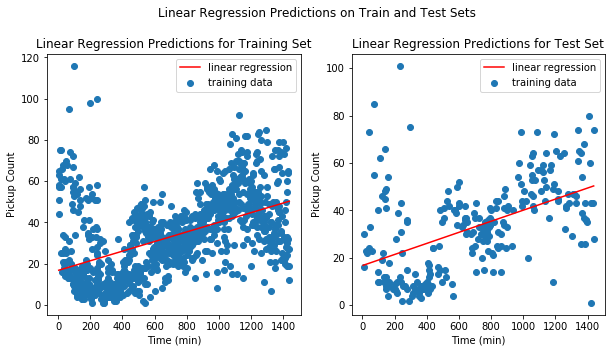

In [13]:
# Plot predictions vs actual
# your code here 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
x = np.linspace(train_data[['TimeMin']].min()[0], train_data[['TimeMin']].max()[0], 100)

# Training set subplot
ax1.scatter(train_data[['TimeMin']], train_data[['PickupCount']], label = 'training data')
ax1.plot(x, 
        OLSModel.predict(sm.add_constant(x)), 
        color = 'red',
        label = 'linear regression')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Pickup Count')
ax1.set_title('Linear Regression Predictions for Training Set')
ax1.legend()

# test set subplot
ax2.scatter(test_data[['TimeMin']], test_data[['PickupCount']], label = 'training data')
ax2.plot(x, 
        OLSModel.predict(sm.add_constant(x)), 
        color = 'red',
        label = 'linear regression')
ax2.set_xlabel('Time (min)')
ax2.set_ylabel('Pickup Count')
ax2.set_title('Linear Regression Predictions for Test Set')
ax2.legend()
fig.subplots_adjust(top=0.85)
fig.suptitle("Linear Regression Predictions on Train and Test Sets")
fig.show()

**3.3 Report the $R^2$ score for the fitted model on both the training and test sets. **

In [14]:
# your code here
train_r_squared = r2_score(train_data.PickupCount, OLSModel.predict(sm.add_constant(train_data.TimeMin)))
test_r_squared = r2_score(test_data.PickupCount, OLSModel.predict(sm.add_constant(test_data.TimeMin)))


print("The R^2 value for the training set is {} and for the test set is {}".format(train_r_squared,test_r_squared))

The R^2 value for the training set is 0.24302603531893352 and for the test set is 0.240661535615741


**3.4 Report the slope and intercept values for the fitted linear model.  **

In [15]:
## show summary
# your code here
OLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.34e-62
Time:                        20:21:20   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.000      14.675      18.826
TimeMin        0.0233      0.001     17.900      0.000       0.021       0.026
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.910
Skew:                           1.111   Prob(JB):                    3.02e-101
Kurtosis:                       5.485   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
OLSModel.params

const      16.750601
TimeMin     0.023335
dtype: float64

**3.5 Report the $95\%$ confidence interval for the slope and intercept.**

In [17]:
# your code here
OLSModel.conf_int()

,0,1
const,14.675141,18.826062
TimeMin,0.020777,0.025893


**3.6 Create a scatter plot of the residuals**

In [18]:
# your code here
train_data['resid'] = train_data.PickupCount - OLSModel.predict(sm.add_constant(train_data.TimeMin))

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Text(0.5,1,'Residuals of Linear Regression')

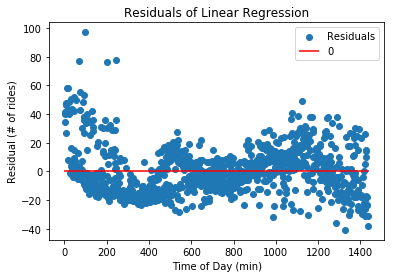

In [19]:
# your code here
plt.scatter(train_data.TimeMin, train_data.resid, label = 'Residuals')
plt.hlines(0, xmin =0, xmax=24*60, color = 'red', label = '0')
plt.legend()
plt.xlabel('Time of Day (min)')
plt.ylabel('Residual (# of rides)')
plt.title('Residuals of Linear Regression')

**3.7 Discuss the results:**

*your answer here*

There are times of the day when the linear regression consistently over or under estimates the number of rides. This means that the model is biased and including higher degree polynomials in the regression may provide better results.

<div class="theme"> Outliers </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or one correct definition of an outlier).**


<div class="exercise"><b> Question 4 [25 pts] </b></div>




**4.1**. We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**4.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**4.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**4.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the 3 outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.


**4.5** Create a figure with two subplots: the first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?



**4.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**4.7**. One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Alter the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order of 'severity').  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step?
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
    
**4.8**. Run your algorithm in 4.7 on the training set data.  
1. What outliers does it identify?
2. How do those outliers compare to the outliers you found in 4.4?
3. How does the general outlier-free Linear Regression model you created in 4.7 perform compared to the simple one in 4.4?

### Answers
**4.1  We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data? ** 

In [20]:
# read the data
# your code here
outliers_train = pd.read_csv('./data/outliers_train.csv')
outliers_test = pd.read_csv('./data/outliers_test.csv')

In [21]:
# your code here
outliers_train.head()

,X,Y
0,-0.773019,-219.103753
1,-0.394034,-334.859357
2,0.630360,-16.232549
3,-0.350418,-179.034618
4,-1.491328,-109.710316


In [22]:
# your code here
outliers_test.head()

,X,Y
0,-0.573524,-91.080764
1,-0.793911,-19.982576
2,0.788391,118.593685
3,0.489036,64.973804
4,1.530648,178.281580


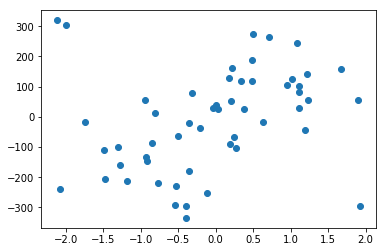

In [23]:
# scatter plot
# your code here
plt.scatter(outliers_train.X, outliers_train.Y)

*your answer here*

There are three notable outliers in the training dataset and, in general, the variance in the data is high.

**4.2 Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create ... **

In [24]:
# your code here
OutliersOLSModel = OLS(outliers_train.Y, sm.add_constant(outliers_train.X)).fit()

**4.3 One potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  
  

In [25]:
print("There are {} points in the training dataset".format(len(outliers_train)))

There are 53 points in the training dataset


In [26]:
from scipy.special import comb
comb(53,3)

23426.0

*your answer here*

There are 53 points in the training dataset. We would need to calculate the linear regression coefficients ${53\choose 3} = 23426$ times.

**4.4 CS109 hack ... **

In [27]:
def find_outliers_simple(dataset_x, dataset_y):
    # your code here
    model = OLS(dataset_y, sm.add_constant(dataset_x)).fit()
    predictions = model.predict(sm.add_constant(dataset_x))
    residuals = abs(dataset_y - predictions)
    residuals_sorted = residuals.sort_values(ascending = False)
    return list(residuals_sorted.index.values[0:3])

In [28]:
# get outliers
# your code here
outlier_indices = find_outliers_simple(outliers_train.Y, outliers_train.X)
outlier_indices

[50, 52, 51]

In [29]:
outlier_free_train = outliers_train.drop(outlier_indices)

In [30]:
# calculate outlier model
# your code here
OutlierFreeSimpleModel = OLS(outlier_free_train.Y, sm.add_constant(outlier_free_train.X)).fit()

**4.5 Create a figure with two subplots: the first is a scatterplot ... **

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


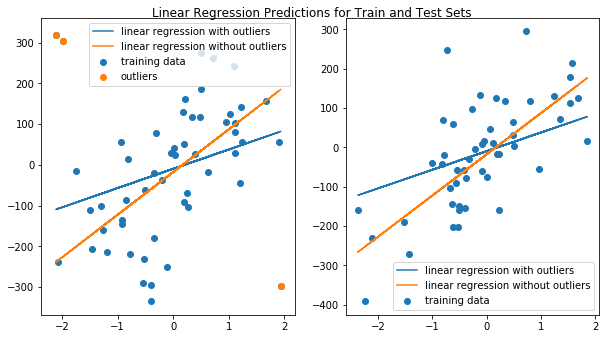

In [31]:
# plot 
# your code here

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))


# Training Set
ax1.scatter(outliers_train.X, 
            outliers_train.Y, 
            label = 'training data')
ax1.scatter(outliers_train.iloc[outlier_indices,:].X, 
            outliers_train.iloc[outlier_indices,:].Y, 
            label = 'outliers')
ax1.plot(outliers_train.X, 
            OutliersOLSModel.predict(sm.add_constant(outliers_train.X)), 
            label = 'linear regression with outliers')
ax1.plot(outliers_train.X, 
            OutlierFreeSimpleModel.predict(sm.add_constant(outliers_train.X)), 
            label = 'linear regression without outliers')
ax1.legend()

# Test Set
ax2.scatter(outliers_test.X, 
            outliers_test.Y, 
            label = 'training data')
ax2.plot(outliers_test.X, 
            OutliersOLSModel.predict(sm.add_constant(outliers_test.X)), 
            label = 'linear regression with outliers')
ax2.plot(outliers_test.X, 
            OutlierFreeSimpleModel.predict(sm.add_constant(outliers_test.X)), 
            label = 'linear regression without outliers')
ax2.legend()

fig.subplots_adjust(top=0.95)
fig.suptitle("Linear Regression Predictions for Train and Test Sets")
fig.show()

*your answer here*

The regression without the outliers seems to fit the test set better.

**4.6  Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?**

In [32]:
# your code here
outlier_r_squared = r2_score(outliers_test.Y, OutliersOLSModel.predict(sm.add_constant(outliers_test.X)))
no_outlier_r_squared = r2_score(outliers_test.Y, OutlierFreeSimpleModel.predict(sm.add_constant(outliers_test.X)))
if outlier_r_squared > no_outlier_r_squared:
    print("The model with outliers has a better R squared score ({} vs. {})".format(outlier_r_squared, no_outlier_r_squared))
else:
    print("The model with outliers removed has a better R squared score ({} vs. {})".format(no_outlier_r_squared, outlier_r_squared))


The model with outliers removed has a better R squared score (0.4529566870167582 vs. 0.34085656043405654)


**4.7 One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers. **

In [33]:
# your code here
def find_outliers_general(dataset_x, dataset_y, z_score = 1.645):
    # your code here
    model = OLS(dataset_y, sm.add_constant(dataset_x)).fit()
    predictions = model.predict(sm.add_constant(dataset_x))
    residuals = dataset_y - predictions
    residuals_norm = (residuals-np.mean(residuals))/np.std(residuals)
    residuals_outliers = residuals_norm[abs(residuals_norm) > z_score]
    return list(residuals_outliers.index)

In [34]:
# get outliers
# your code here
outlier_indices_general = find_outliers_general(outliers_train.X, outliers_train.Y)
outlier_indices_general

[1, 14, 28, 50, 51, 52]

In [35]:
outlier_free_general_train = outliers_train.drop(outlier_indices_general)

In [36]:
# calculate outlier model
# your code here
OutlierFreeGeneralModel = OLS(outlier_free_general_train.Y, sm.add_constant(outlier_free_general_train.X)).fit()

**4.8 Run your algorithm in 4.7 on the training set data **

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


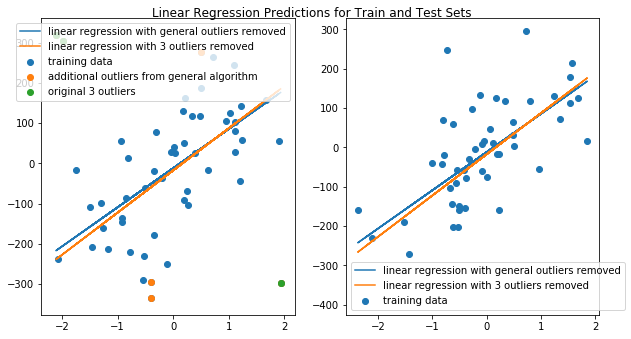

In [37]:
# your code here
# plot 
# your code here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

# Training Set
ax1.scatter(outliers_train.X, 
            outliers_train.Y, 
            label = 'training data')
ax1.scatter(outliers_train.iloc[outlier_indices_general,:].X, 
            outliers_train.iloc[outlier_indices_general,:].Y, 
            label = 'additional outliers from general algorithm')
ax1.scatter(outliers_train.iloc[outlier_indices,:].X, 
            outliers_train.iloc[outlier_indices,:].Y, 
            label =  'original 3 outliers')
ax1.plot(outliers_train.X, 
            OutlierFreeGeneralModel.predict(sm.add_constant(outliers_train.X)), 
            label = 'linear regression with general outliers removed')
ax1.plot(outliers_train.X, 
            OutlierFreeSimpleModel.predict(sm.add_constant(outliers_train.X)), 
            label = 'linear regression with 3 outliers removed')
ax1.legend()

# Test Set
ax2.scatter(outliers_test.X, 
            outliers_test.Y, 
            label = 'training data')
ax2.plot(outliers_test.X, 
            OutlierFreeGeneralModel.predict(sm.add_constant(outliers_test.X)), 
            label = 'linear regression with general outliers removed')
ax2.plot(outliers_test.X, 
            OutlierFreeSimpleModel.predict(sm.add_constant(outliers_test.X)), 
            label = 'linear regression with 3 outliers removed')
ax2.legend()

fig.subplots_adjust(top=0.95)
fig.suptitle("Linear Regression Predictions for Train and Test Sets")
fig.show()

In [38]:
print("Simple Outlier Free Regression Model R Squared (Test Set): ", 
     r2_score(outliers_test.Y,OutlierFreeSimpleModel.predict(sm.add_constant(outliers_test.X))))
print("General Outlier Free Regression Model R Squared (Test Set): ", 
     r2_score(outliers_test.Y,OutlierFreeGeneralModel.predict(sm.add_constant(outliers_test.X))))

Simple Outlier Free Regression Model R Squared (Test Set):  0.4529566870167582
General Outlier Free Regression Model R Squared (Test Set):  0.4615954538492467


*your answer here*

**What outliers does it identify?**

The outliers identified by the general algorithm that were not identified by the simple algorithm are highlighted in orange (the original outliers are green).

**How do those outliers compare to the outliers you found in 4.4?**

Though it does seem like these points are in the tails of the inferred normal distributions at these points, they are different from the original outliers in that there seems to be data nearby these "outliers". Though the general outliers have high residuals, it could be that the $p(y|x)$ has higher variance at these x values, which would contradict the assumptions of the ordinarly least squares linear regression, and in turn make this general method of detecting outliers not effective.

**How does the general outlier-free Linear Regression model you created in 4.7 perform compared to the simple one in 4.4?**

The general outlier free regression model seems to perform similarly to the simple model, though the general model has a slightly higher R^2 value (0.46 vs. 0.45). This suggests that the general model has greater explanatory power, but additional tests should be performed to assess this hypothesis.